In [1]:
# import EDA library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

### Reading The Data

In [2]:
df = pd.read_csv('telecom_users - telecom_users.csv')
df.head(5)

,Unnamed: 0,customerID,gender,Age,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,CashBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,32,Yes,Yes,72 month,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Yes,Credit card (automatic),24.1,1734.65,No
1,4528,9688-YGXVR,NaN,25,No,No,44 month,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,No,Credit card (automatic),88.15,3973.20,No
2,6344,9286-DOJGF,Female,66,Yes,No,38 month,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,No,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,35,No,No,4 month,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,No,Electronic check,55.9,238.50,No
4,432,2181-UAESM,Male,26,No,No,2 month,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Yes,Electronic check,53.45,119.50,No


In [3]:
# simple data checking - get dataframe general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5984 non-null   object 
 3   Age               5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   object 
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5396 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [4]:
# simple data checking - get row and column of dataframe
df.shape

(5986, 23)

### Correcting data types

In [5]:
# remove string
df['tenure'] = df['tenure'].apply(lambda x: x.replace('month', ''))

# convert tenure to numeric values
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# convert MonthlyCharges to numeric values
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

### Data Cleansing

Because the Unnamed: 0 column is a serial number of data but there are some missing numbers, then we will drop the column. 

In [6]:
# drop unused column
df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
# drop unesed column
df = df.drop(['customerID'], axis=1)

In [8]:
# counts values each column in df
for col in df.select_dtypes('object').columns:
    print(col, '\n')
    print(df[col].value_counts(), '\n')

gender 

Male      3049
Female    2935
Name: gender, dtype: int64 

Partner 

No     3082
Yes    2904
Name: Partner, dtype: int64 

Dependents 

No     4195
Yes    1791
Name: Dependents, dtype: int64 

PhoneService 

Yes    5396
No      590
Name: PhoneService, dtype: int64 

MultipleLines 

No     2848
Yes    2548
Name: MultipleLines, dtype: int64 

InternetService 

Fiber optic                2627
DSL                        1980
No                         1292
Digital Subscriber Line      87
Name: InternetService, dtype: int64 

OnlineSecurity 

No                     2982
Yes                    1713
No internet service    1291
Name: OnlineSecurity, dtype: int64 

OnlineBackup 

No                     2605
Yes                    2090
No internet service    1291
Name: OnlineBackup, dtype: int64 

DeviceProtection 

No                     2640
Yes                    2055
No internet service    1291
Name: DeviceProtection, dtype: int64 

TechSupport 

No                     2960
Yes     

Likewise with the PaperlessBilling column and CashBilling column, both of which have values that can be combined into one column only. Therefore we decided to choose only one column by dropping the CashBilling column.

In [9]:
# drop unused column
df = df.drop(['CashBilling'], axis=1)

In [10]:
# check missing value
df.isnull().sum()

gender                2
Age                   0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       590
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        6
TotalCharges         10
Churn                 0
dtype: int64

In [11]:
# handle missing data - drop row in gender column
df = df.dropna(subset=['gender'])

In [12]:
# filter only NaN values in MultipleLines column
df_MultipleLines = df[df['MultipleLines'].isnull()]

# counts values each column in df_MultipleLines
for col in df_MultipleLines.select_dtypes('object').columns:
    print(col, '\n')
    print(df_MultipleLines[col].value_counts(), '\n')

gender 

Male      305
Female    285
Name: gender, dtype: int64 

Partner 

No     326
Yes    264
Name: Partner, dtype: int64 

Dependents 

No     413
Yes    177
Name: Dependents, dtype: int64 

PhoneService 

No    590
Name: PhoneService, dtype: int64 

MultipleLines 

Series([], Name: MultipleLines, dtype: int64) 

InternetService 

DSL                        566
Digital Subscriber Line     24
Name: InternetService, dtype: int64 

OnlineSecurity 

No     349
Yes    241
Name: OnlineSecurity, dtype: int64 

OnlineBackup 

No     342
Yes    248
Name: OnlineBackup, dtype: int64 

DeviceProtection 

No     326
Yes    264
Name: DeviceProtection, dtype: int64 

TechSupport 

No     346
Yes    244
Name: TechSupport, dtype: int64 

StreamingTV 

No     343
Yes    247
Name: StreamingTV, dtype: int64 

StreamingMovies 

No     333
Yes    257
Name: StreamingMovies, dtype: int64 

Contract 

Month-to-month    324
Two year          136
One year          130
Name: Contract, dtype: int64 

Paperles

In [13]:
# replace NaN values with specific string
df['MultipleLines'] = df['MultipleLines'].fillna('No phone service')

In [14]:
# replace with actual word
df['InternetService'] = df['InternetService'].replace('Digital Subscriber Line', 'DSL')

In [15]:
# filter only No values in InternetService column
df_internet = df[df['InternetService']=='No']

# counts values each column in df_internet
for col in df_internet.select_dtypes('object').columns:
    print(col, '\n')
    print(df_internet[col].value_counts(), '\n')

gender 

Male      664
Female    627
Name: gender, dtype: int64 

Partner 

No     662
Yes    629
Name: Partner, dtype: int64 

Dependents 

No     743
Yes    548
Name: Dependents, dtype: int64 

PhoneService 

Yes    1291
Name: PhoneService, dtype: int64 

MultipleLines 

No     997
Yes    294
Name: MultipleLines, dtype: int64 

InternetService 

No    1291
Name: InternetService, dtype: int64 

OnlineSecurity 

No internet service    1290
No                        1
Name: OnlineSecurity, dtype: int64 

OnlineBackup 

No internet service    1290
No                        1
Name: OnlineBackup, dtype: int64 

DeviceProtection 

No internet service    1290
No                        1
Name: DeviceProtection, dtype: int64 

TechSupport 

No internet service    1290
No                        1
Name: TechSupport, dtype: int64 

StreamingTV 

No internet service    1290
No                        1
Name: StreamingTV, dtype: int64 

StreamingMovies 

No internet service    1290
Yes              

In [16]:
internet_service = ['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies']

# replace all columns in internet_service with actual word
for col in internet_service:
    df[col] = df[col].where(df['InternetService']!='No', 'No internet service')  

In [17]:
df['PaymentMethod'] = df['PaymentMethod'].where(df['PaymentMethod']!='Bank transfer', 'Bank transfer (automatic)')
df['PaymentMethod'] = df['PaymentMethod'].where(df['PaymentMethod']!='Credit card', 'Credit card (automatic)')

In [18]:
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['TotalCharges'].divide(df['tenure']))

The missing TotalCharge column indicates that there were no charges for that customer until the time the data was obtained. The 'tenure' feature shows how long someone has been a customer. Let's examine the number of samples with a value of '0' on the feature and, if we also find 10 customers, compare whether their index matches the index of the value 'missing'.

In [19]:
df['tenure'].isin([0]).sum()

10

In [20]:
print(df[df['tenure'].isin([0])].index)
print(df[df['TotalCharges'].isna()].index)

Int64Index([356, 634, 2771, 3086, 3255, 4326, 5375, 5382, 5695, 5951], dtype='int64')
Int64Index([356, 634, 2771, 3086, 3255, 4326, 5375, 5382, 5695, 5951], dtype='int64')


In [21]:
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].replace(np.nan,0)

In [22]:
# counts unique values in df
for col in df.select_dtypes('object').columns:
    print(col, '- # unique values:', df[col].nunique())

gender - # unique values: 2
Partner - # unique values: 2
Dependents - # unique values: 2
PhoneService - # unique values: 2
MultipleLines - # unique values: 3
InternetService - # unique values: 3
OnlineSecurity - # unique values: 3
OnlineBackup - # unique values: 3
DeviceProtection - # unique values: 3
TechSupport - # unique values: 3
StreamingTV - # unique values: 3
StreamingMovies - # unique values: 3
Contract - # unique values: 3
PaperlessBilling - # unique values: 2
PaymentMethod - # unique values: 4
Churn - # unique values: 2


In [23]:
# counts values each column in df
for col in df.select_dtypes('object').columns:
    print(col, '\n')
    print(df[col].value_counts(), '\n')

gender 

Male      3049
Female    2935
Name: gender, dtype: int64 

Partner 

No     3080
Yes    2904
Name: Partner, dtype: int64 

Dependents 

No     4193
Yes    1791
Name: Dependents, dtype: int64 

PhoneService 

Yes    5394
No      590
Name: PhoneService, dtype: int64 

MultipleLines 

No                  2846
Yes                 2548
No phone service     590
Name: MultipleLines, dtype: int64 

InternetService 

Fiber optic    2626
DSL            2067
No             1291
Name: InternetService, dtype: int64 

OnlineSecurity 

No                     2980
Yes                    1713
No internet service    1291
Name: OnlineSecurity, dtype: int64 

OnlineBackup 

No                     2604
Yes                    2089
No internet service    1291
Name: OnlineBackup, dtype: int64 

DeviceProtection 

No                     2639
Yes                    2054
No internet service    1291
Name: DeviceProtection, dtype: int64 

TechSupport 

No                     2958
Yes                    17

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5984.0,31.947527,13.564768,18.000000,23.00,28.000,34.0,70.00
tenure,5984.0,32.466410,24.520013,0.000000,9.00,29.000,56.0,72.00
MonthlyCharges,5984.0,64.805127,30.112739,17.588462,35.65,70.400,89.9,118.75
TotalCharges,5984.0,2294.217756,2274.339829,0.000000,401.45,1408.575,3839.3,8684.80


## Exploratory Data Analysis

In [25]:
df.columns

Index(['gender', 'Age', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
demo_features = ['gender', 'Partner', 'Dependents']
service_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies']
acc_info_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']
numerical_features = ['Age', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [27]:
#Label encoding Churn to use sns.barplot
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
df['Churn'].value_counts()

0    4397
1    1587
Name: Churn, dtype: int64

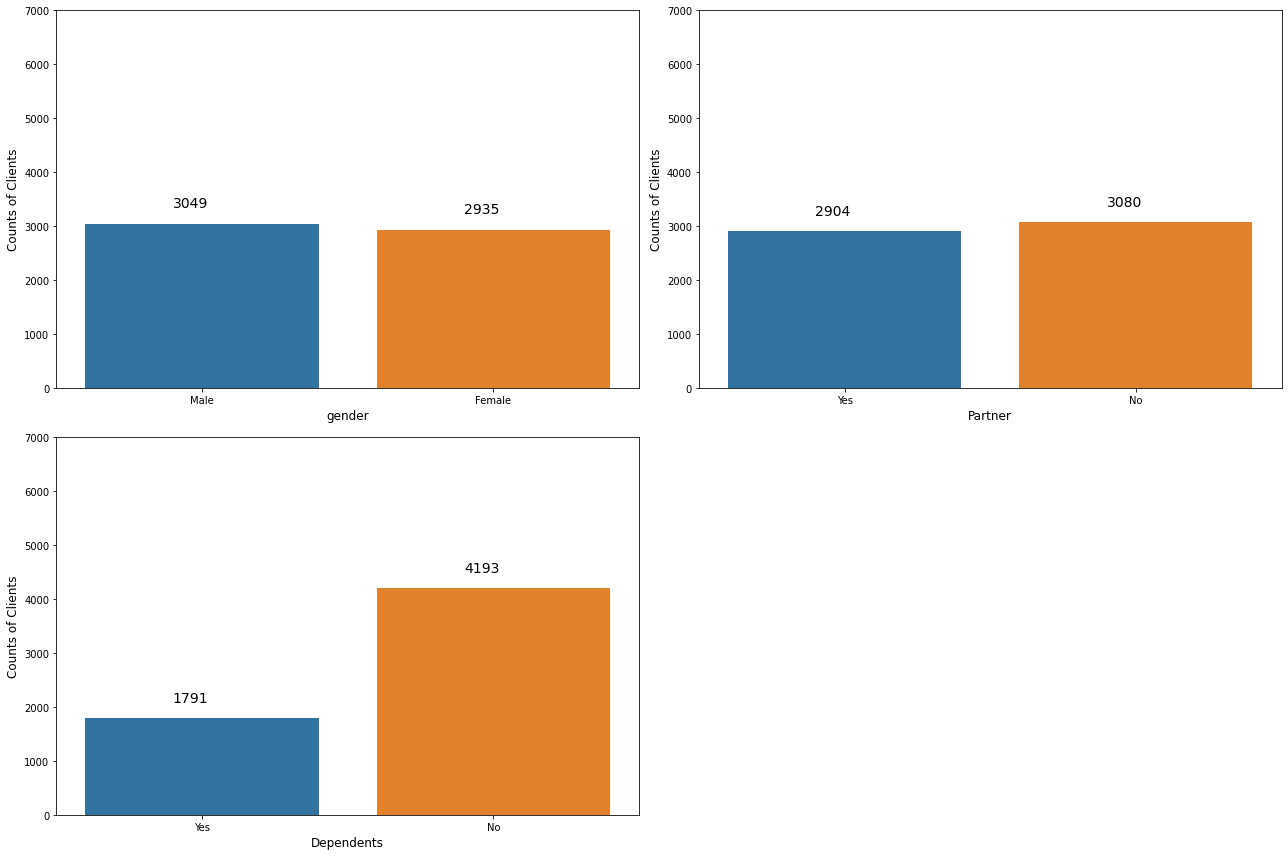

In [28]:
plt.figure(figsize=(18,12))

for i, col in enumerate(demo_features):
    
    plt.subplot(2, 2, i + 1)
    ax = sns.countplot(x=col, data=df)
    
    plt.xlabel(col, fontsize= 12)
    plt.ylabel('Counts of Clients', fontsize= 12)
    plt.ylim(0,7000)
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 14)
    
plt.tight_layout()    
    
plt.show()

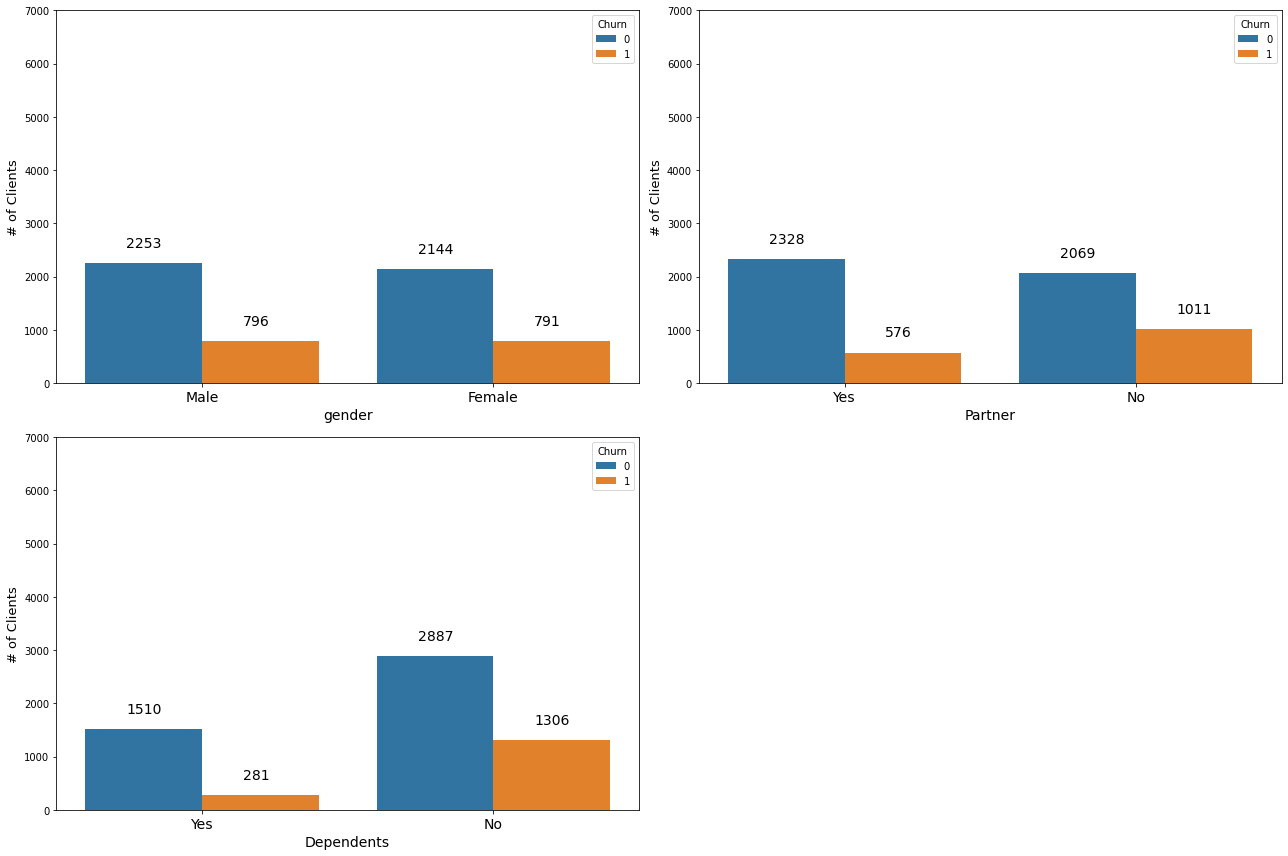

In [29]:
plt.figure(figsize=(18,12))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

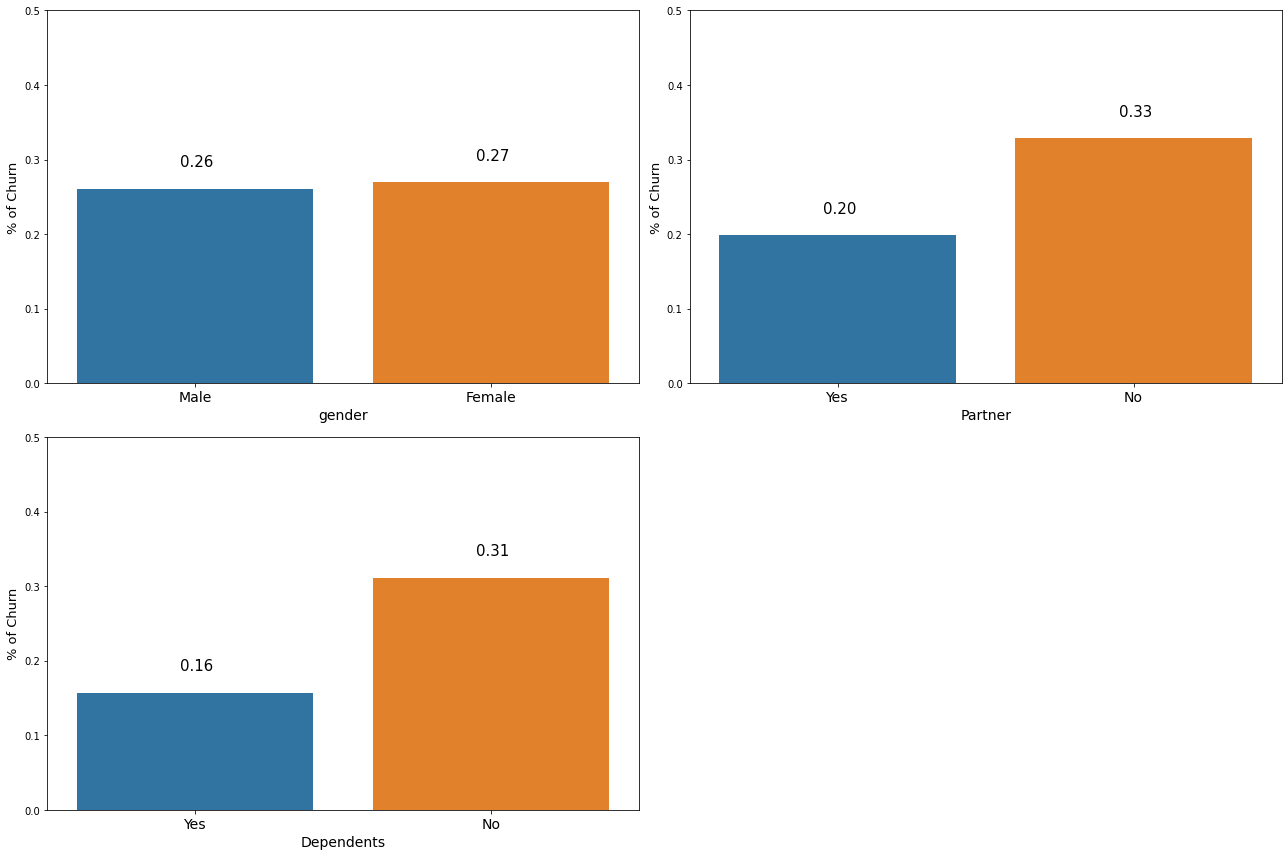

In [30]:
plt.figure(figsize=(18,12))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = df, ci = None)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("% of Churn", fontsize= 13)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=15)

plt.tight_layout()

plt.show()

In [31]:
df.groupby(['Partner'])['Dependents'].value_counts()

Partner  Dependents
No       No            2773
         Yes            307
Yes      Yes           1484
         No            1420
Name: Dependents, dtype: int64

In [32]:
df.groupby(by=['Partner', 'Dependents'])['Churn'].value_counts(normalize = True)

Partner  Dependents  Churn
No       No          0        0.659214
                     1        0.340786
         Yes         0        0.785016
                     1        0.214984
Yes      No          0        0.745775
                     1        0.254225
         Yes         0        0.855121
                     1        0.144879
Name: Churn, dtype: float64

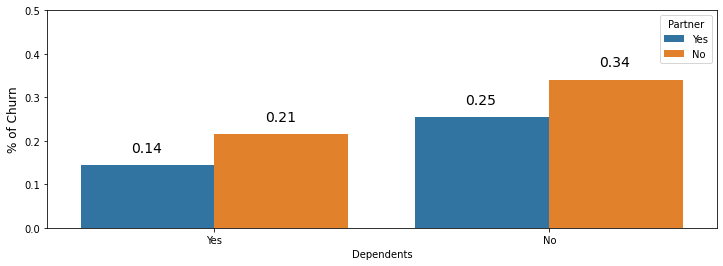

In [33]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = 'Dependents', y = 'Churn', hue = 'Partner', data = df, ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.15, p.get_height()+0.03),fontsize=14)

plt.show()

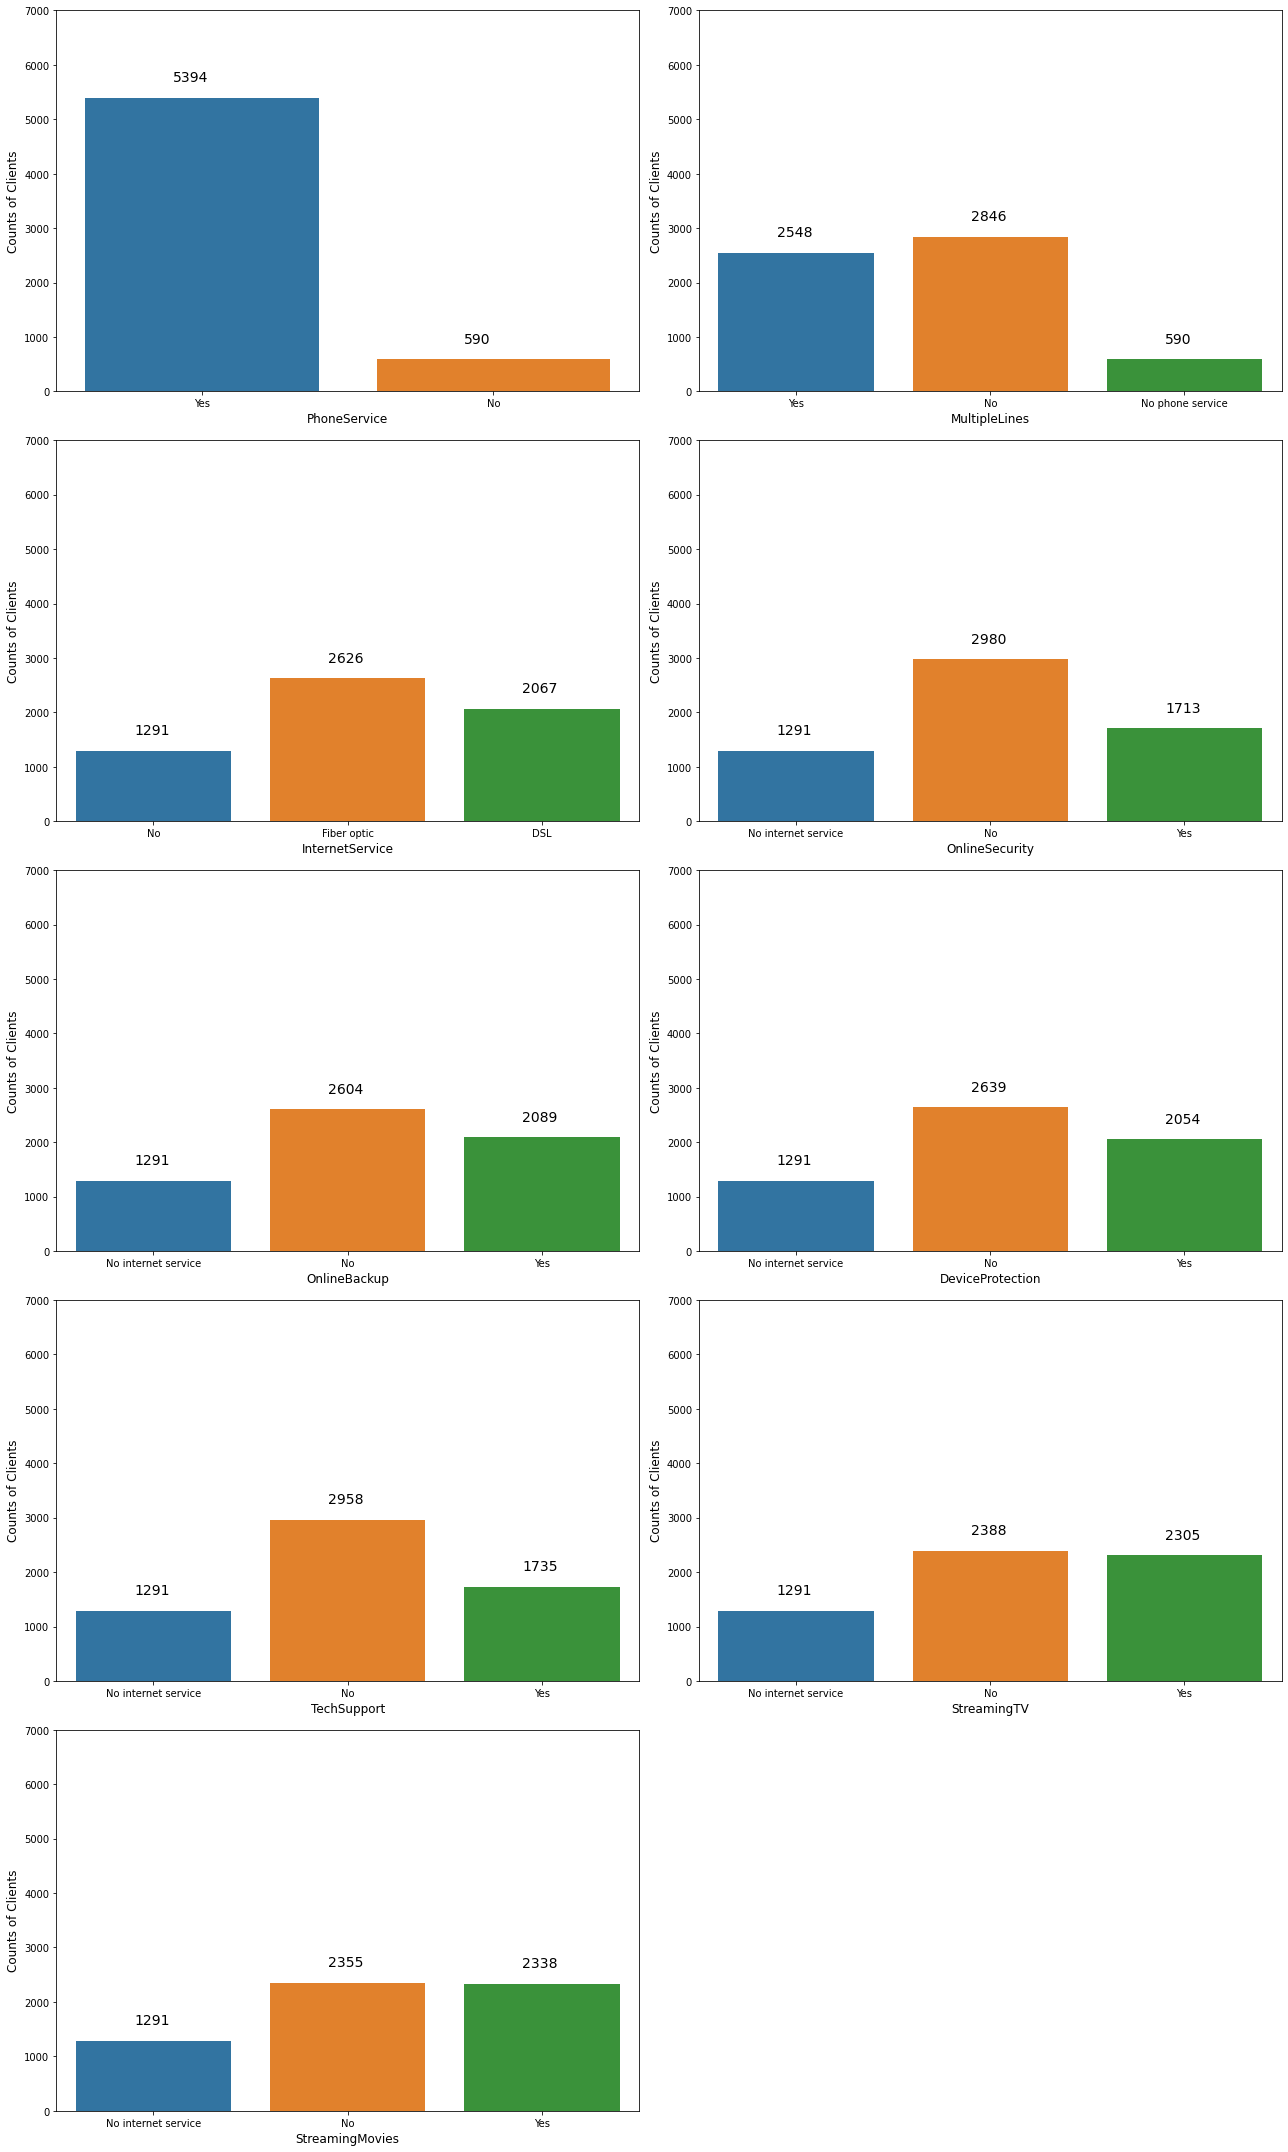

In [34]:
plt.figure(figsize=(18,30))

for i, col in enumerate(service_features):
    
    plt.subplot(5, 2, i + 1)
    ax = sns.countplot(x=col, data=df)
    
    plt.xlabel(col, fontsize= 12)
    plt.ylabel('Counts of Clients', fontsize= 12)
    plt.ylim(0,7000)
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 14)
    
plt.tight_layout()    
    
plt.show()

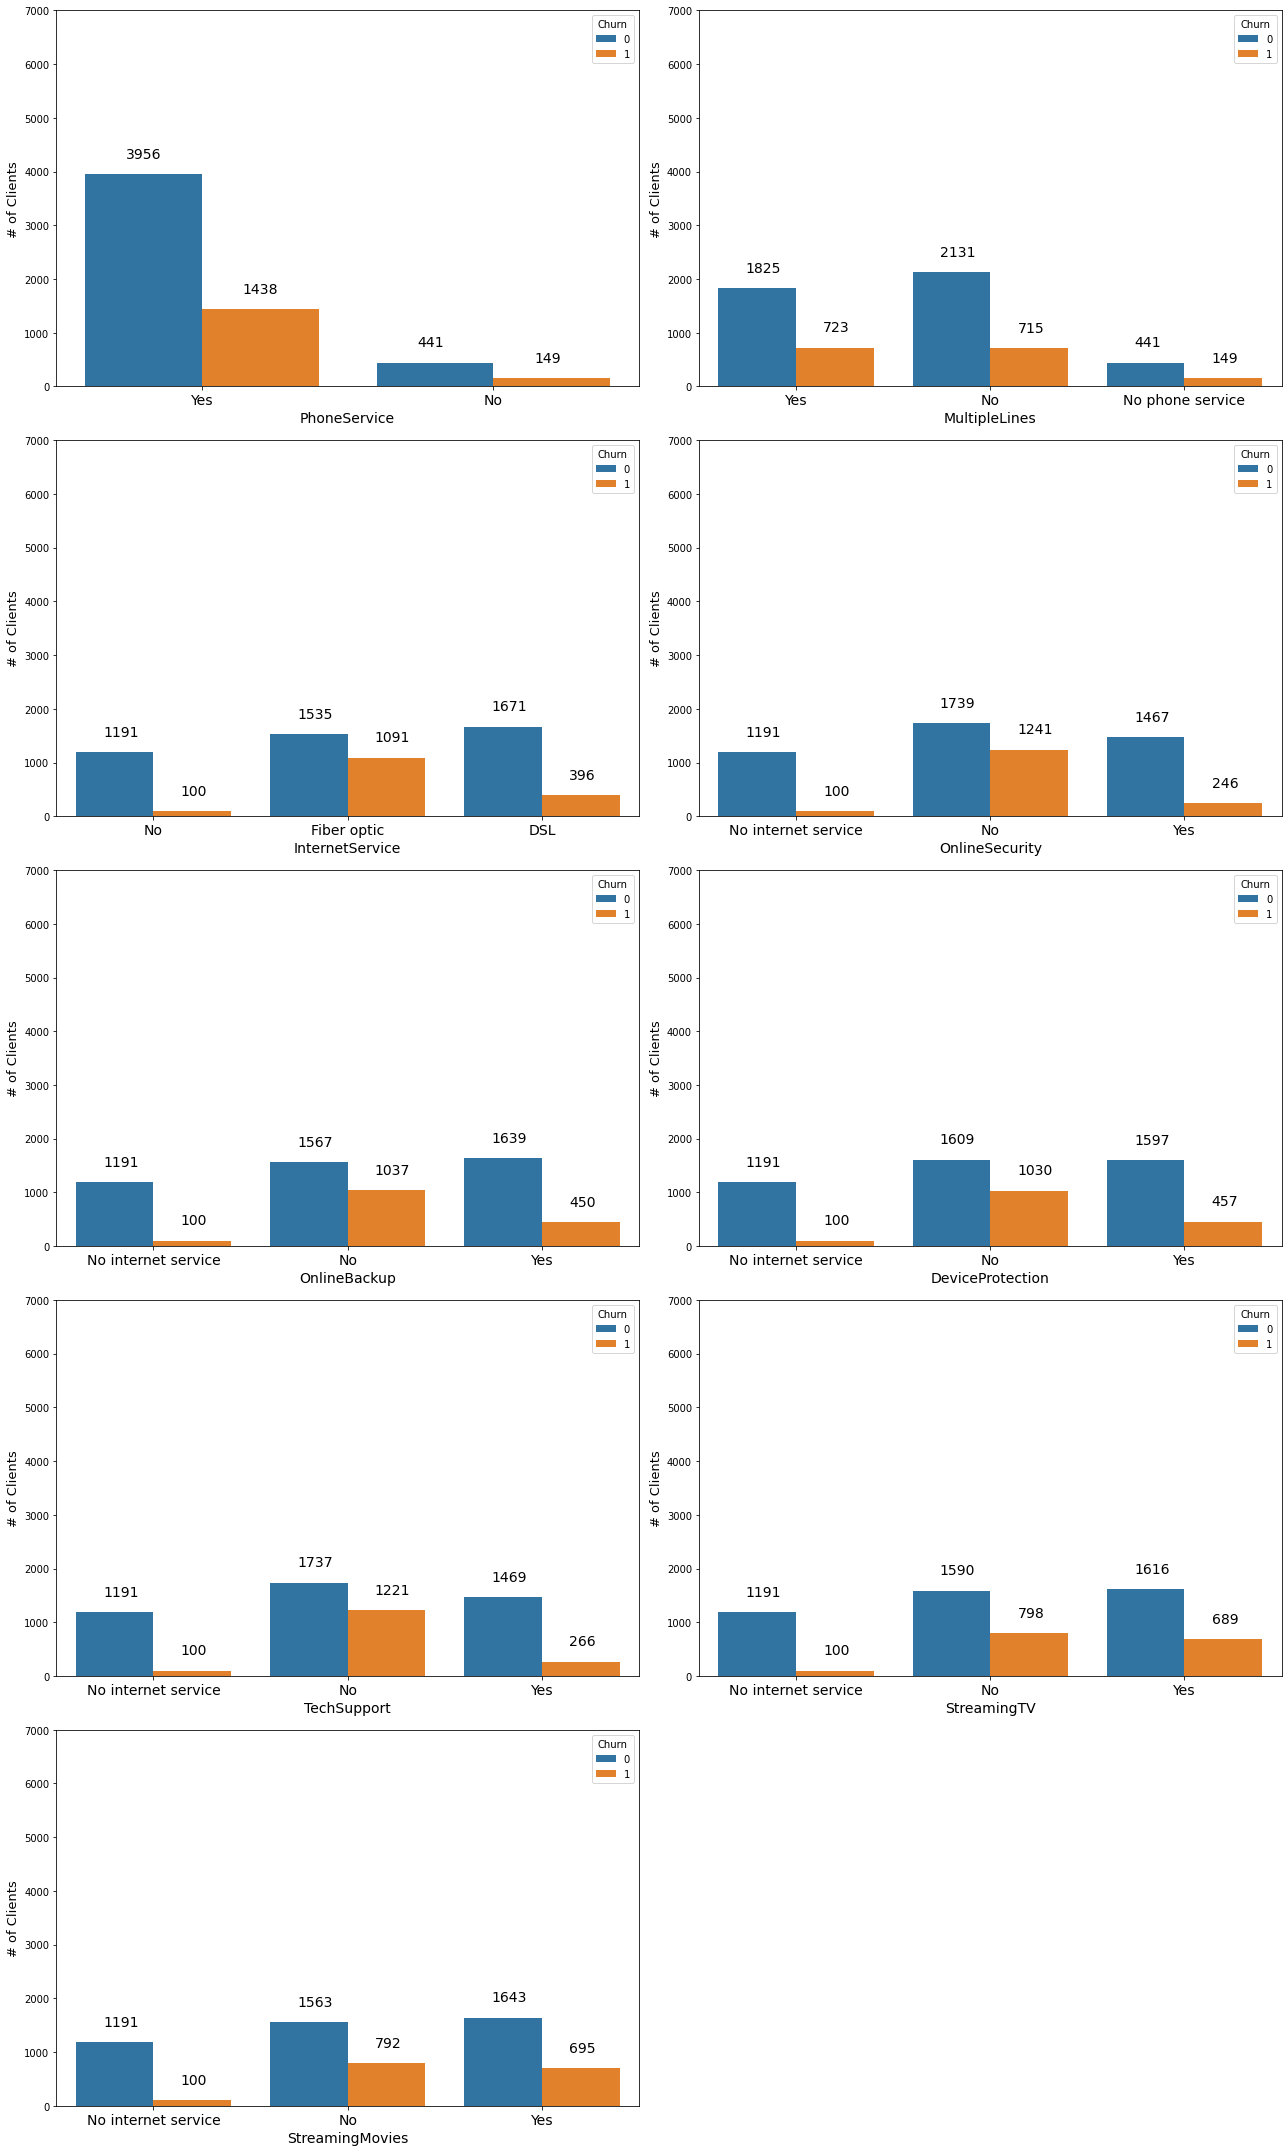

In [35]:
plt.figure(figsize=(18,30))

for i,col in enumerate(service_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

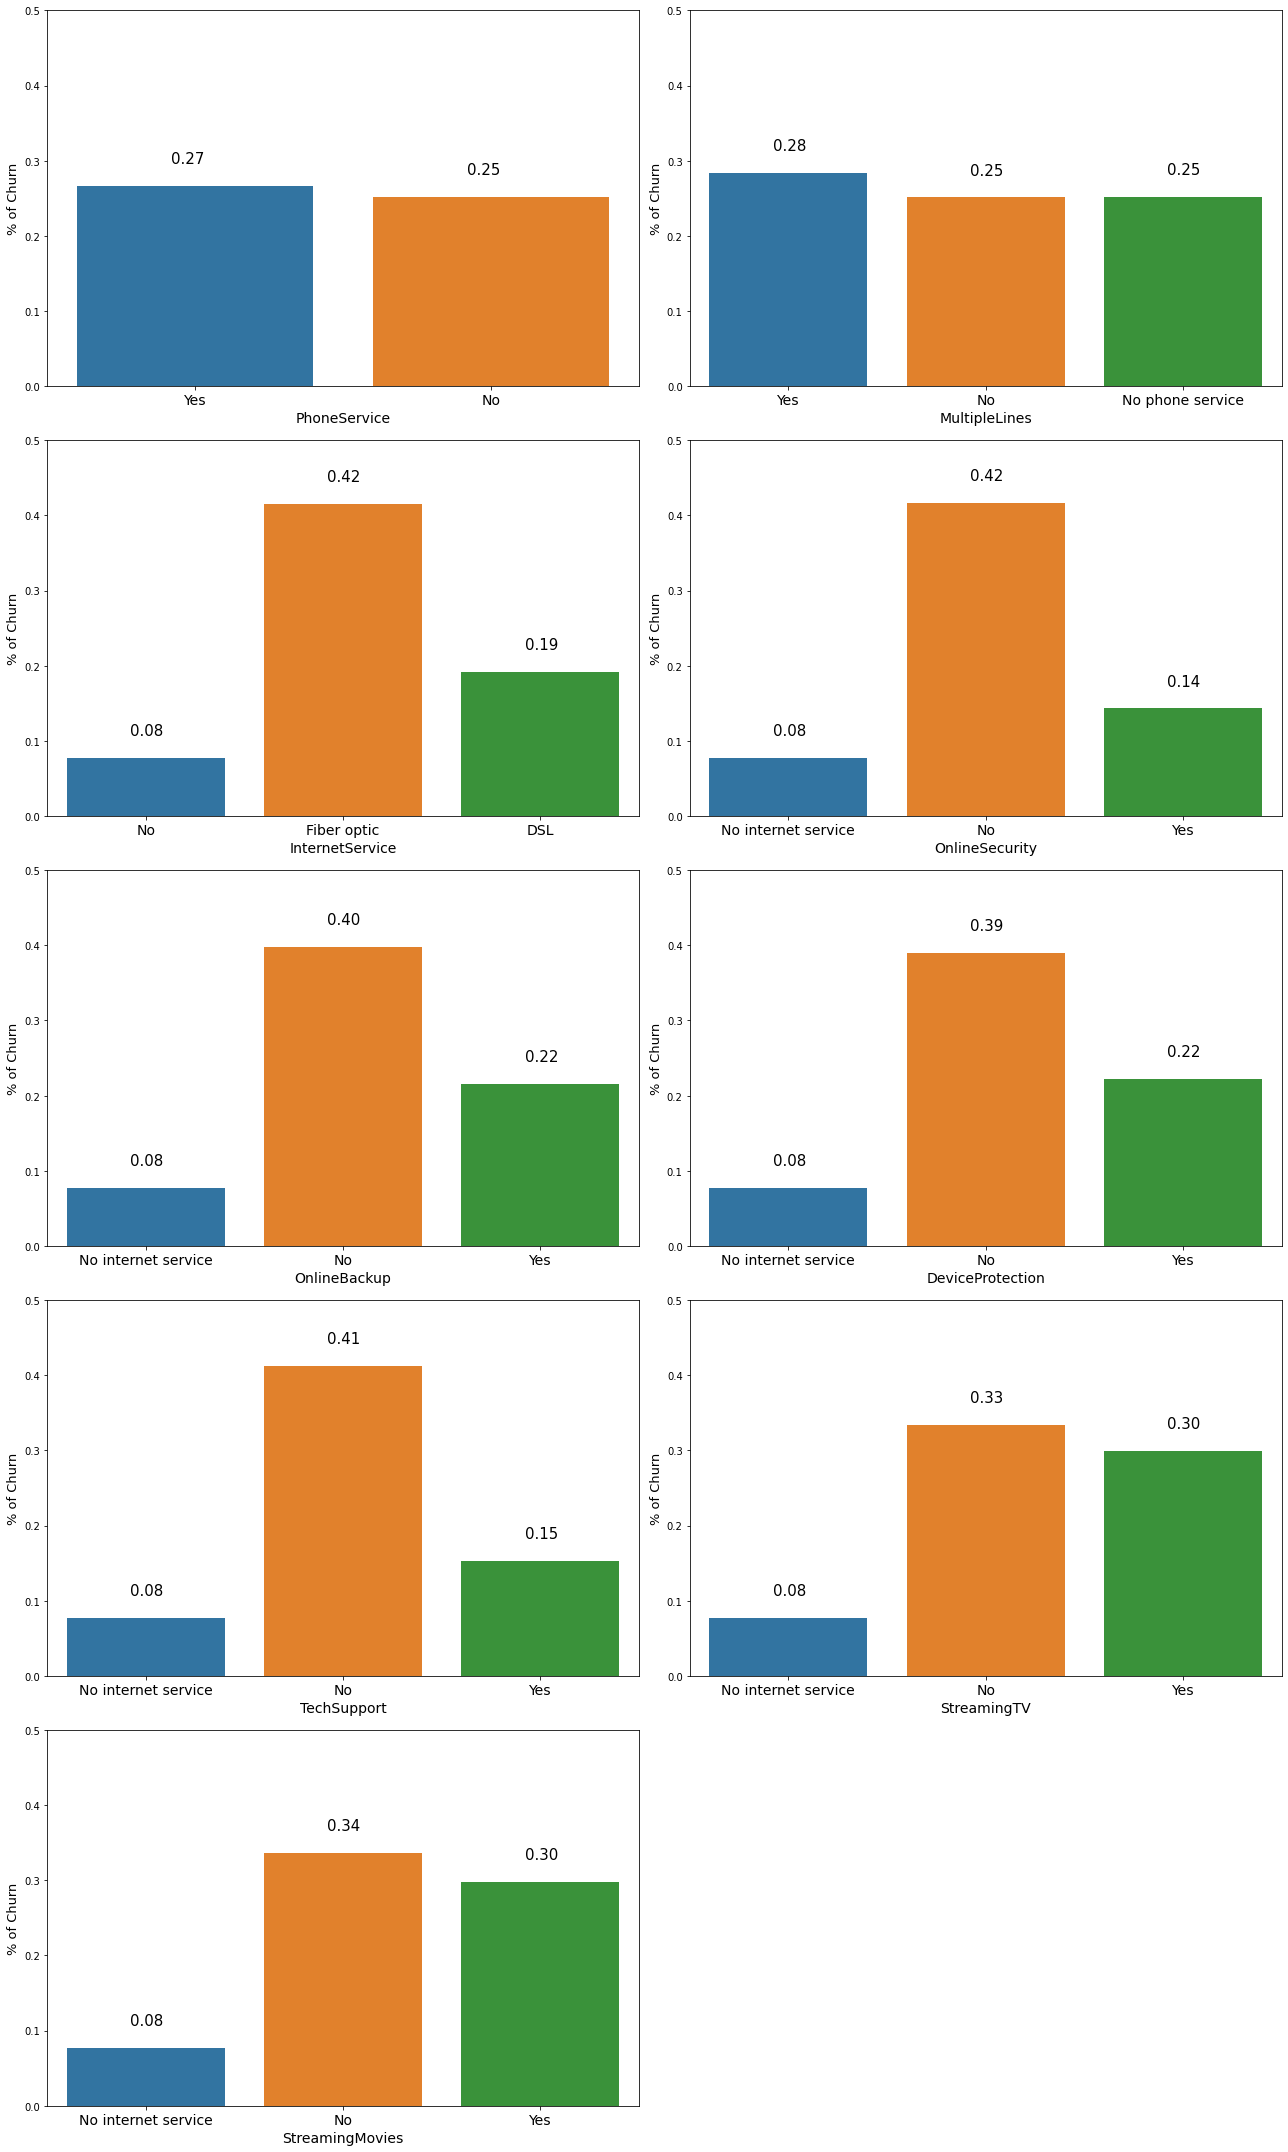

In [36]:
plt.figure(figsize=(18,30))

for i,col in enumerate(service_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = df, ci = None)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("% of Churn", fontsize= 13)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.32, p.get_height()+0.03),fontsize=15)

plt.tight_layout()

plt.show()

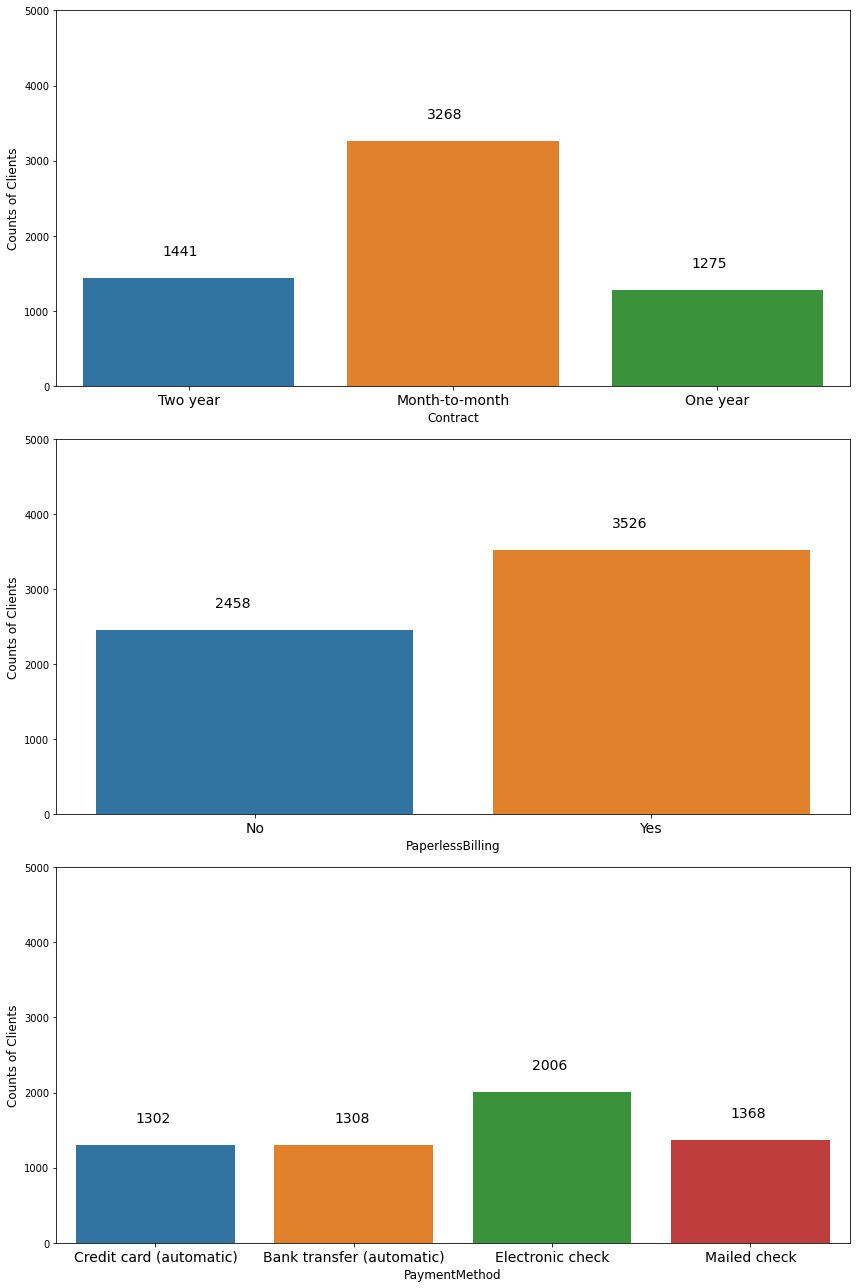

In [37]:
plt.figure(figsize=(12,18))

for i, col in enumerate(acc_info_features):
    
    plt.subplot(3, 1, i + 1)
    ax = sns.countplot(x=col, data=df)
    
    plt.xlabel(col, fontsize= 12)
    plt.ylabel('Counts of Clients', fontsize= 12)
    plt.ylim(0,5000)
    plt.xticks(size=14)
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 14)
    
plt.tight_layout()    
    
plt.show()

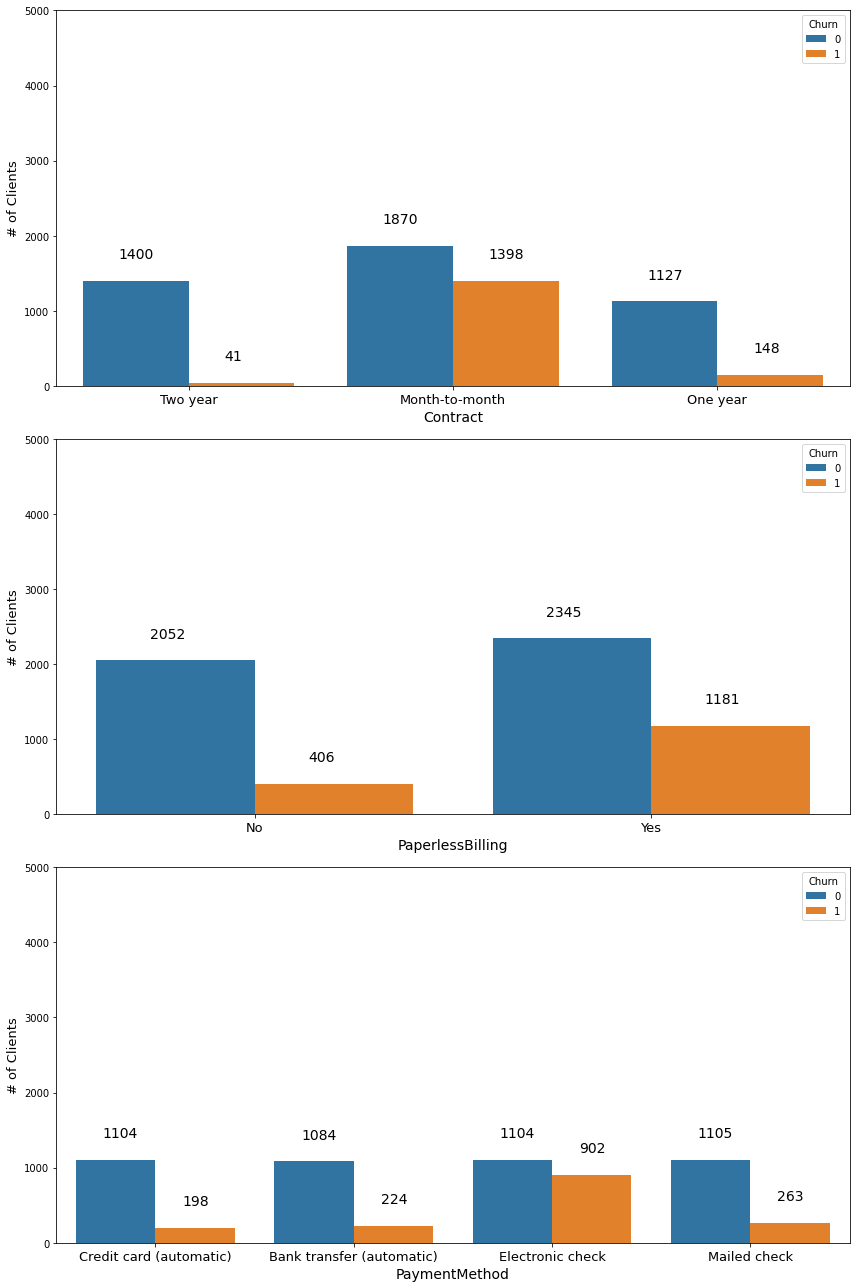

In [38]:
plt.figure(figsize=(12,18))

for i,col in enumerate(acc_info_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 13)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.135, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

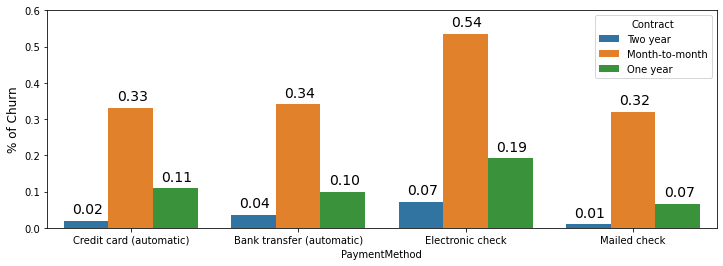

In [39]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "PaymentMethod", y = "Churn", hue = "Contract", data = df, ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,0.6)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.05, p.get_height()+0.020),fontsize=14)

plt.show()

In [40]:
print(df.groupby(by=['InternetService'])['PaperlessBilling'].value_counts(normalize = True), '\n')
print(df.groupby(by=['InternetService'])['PaymentMethod'].value_counts(normalize = True))

InternetService  PaperlessBilling
DSL              Yes                 0.544751
                 No                  0.455249
Fiber optic      Yes                 0.773039
                 No                  0.226961
No               No                  0.713400
                 Yes                 0.286600
Name: PaperlessBilling, dtype: float64 

InternetService  PaymentMethod            
DSL              Electronic check             0.266570
                 Mailed check                 0.253507
                 Credit card (automatic)      0.246734
                 Bank transfer (automatic)    0.233188
Fiber optic      Electronic check             0.513709
                 Bank transfer (automatic)    0.211348
                 Credit card (automatic)      0.193450
                 Mailed check                 0.081493
No               Mailed check                 0.487994
                 Credit card (automatic)      0.219985
                 Bank transfer (automatic)    0.209915
 

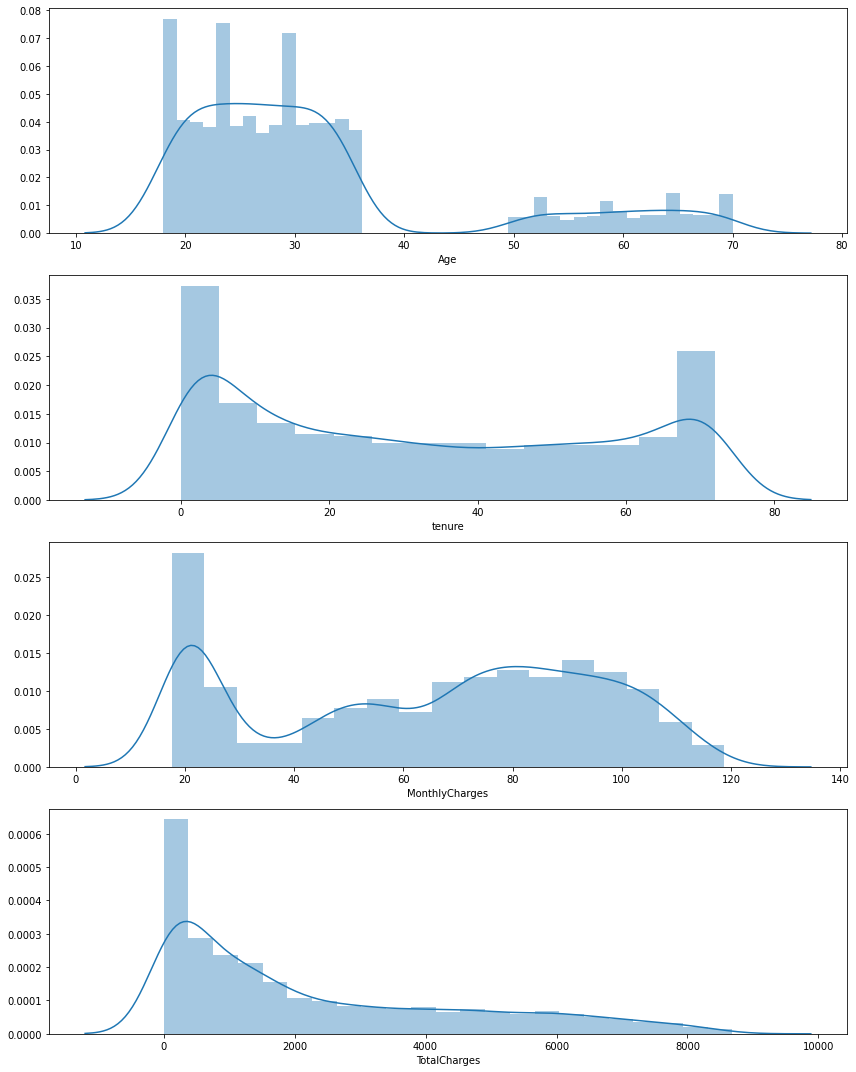

In [41]:
plt.figure(figsize=(12,15))

for i,col in enumerate(numerical_features):    
    plt.subplot(4,1,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ylabel('')
    plt.tight_layout()

plt.show()

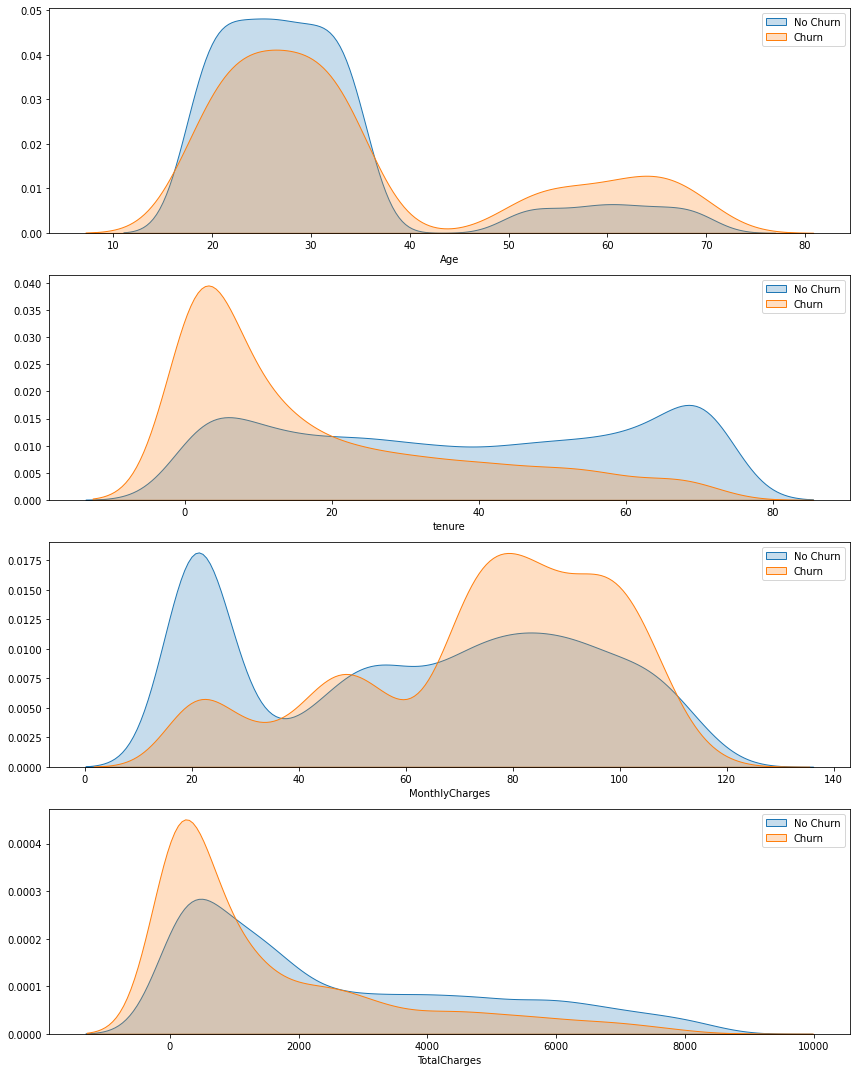

In [42]:
plt.figure(figsize=(12,15))

for i,col in enumerate(numerical_features):    
    plt.subplot(4,1,i + 1)    
    sns.kdeplot(df.loc[(df['Churn'] == 0), col], label = 'No Churn', shade = True)
    sns.kdeplot(df.loc[(df['Churn'] == 1), col], label = 'Churn', shade = True)
    plt.legend()
    plt.ylabel('')
    plt.tight_layout()

plt.show()

What we can observe for each feature:

- Age: Somewhat similar distribution, but the 'No churn' distribution has high values for young people and low values for old people.
- Tenure: High concentration of churned customer in the first months.
- Monthly Charges: High concentration of churned customer in higher values (around 60 and beyond)
- Total Charges: Somewhat similar distributions, but the ‘No churn’ distribution have lower values.

**Let's clarify our analysis**

We will try to divide the age by some groups to see the churn rate.

In [43]:
df['age_bin'] = pd.cut(df['Age'],[-1,20,40,60,80])
df['age_bin'].value_counts(sort = False)

(-1, 20]     852
(20, 40]    4166
(40, 60]     482
(60, 80]     484
Name: age_bin, dtype: int64

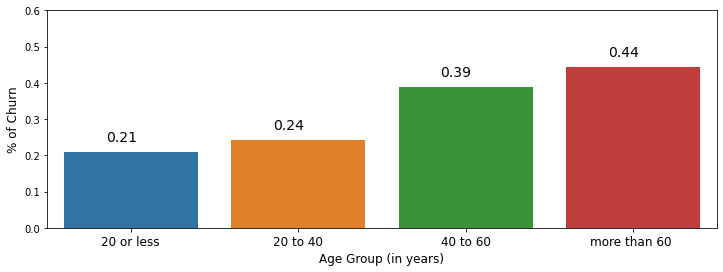

In [44]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "age_bin", y = "Churn", data = df, ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,0.6)
plt.xticks([0,1,2,3], ['20 or less', '20 to 40', '40 to 60', 'more than 60 '], fontsize = 12)
plt.xlabel("Age Group (in years)", fontsize= 12)



for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=14)

plt.show()

Almoust 50 percent of those who become customers are older people. It's not uncommon to have a higher churn rate as they get older, they tend to choose the services they really need and when it fits they will continue to stick around.

In [45]:
# drop unused column
df = df.drop(['age_bin'], axis = 1)

As expected, the average tenure period for churned customers is lower and the average monthly charges are higher than the same metrics for retained customers. The average total charges are lower for churned customers, which is probably due to their lower tenure.

In [46]:
print(df.groupby(by=['Churn'])['tenure'].mean().sort_values(), '\n')
print(df.groupby(by=['Churn'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['Churn'])['TotalCharges'].mean().sort_values())

Churn
1    18.246377
0    37.598817
Name: tenure, dtype: float64 

Churn
0    61.426934
1    74.164871
Name: MonthlyCharges, dtype: float64 

Churn
1    1550.701985
0    2562.573345
Name: TotalCharges, dtype: float64



The density plot for churned customers in the ‘tenure’ feature showed a high concentration in the first months. Let’s divide this feature in bins to get the churn rate per year of service.

In [47]:
df['tenure_bin'] = pd.cut(df['tenure'],[-1,12,24,36,48,60,100])
df['tenure_bin'].value_counts(sort = False)

(-1, 12]     1848
(12, 24]      859
(24, 36]      721
(36, 48]      651
(48, 60]      710
(60, 100]    1195
Name: tenure_bin, dtype: int64

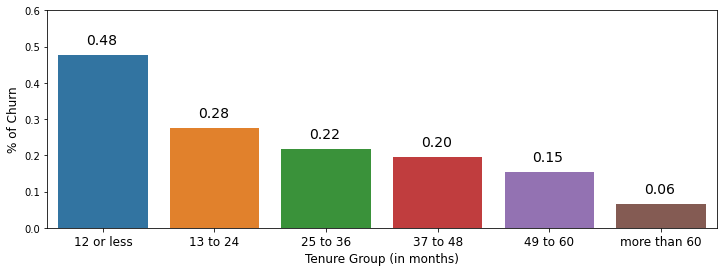

In [48]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "tenure_bin", y = "Churn", data = df, ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,0.6)
plt.xticks([0,1,2,3,4,5], ['12 or less', '13 to 24', '25 to 36', '37 to 48', '49 to 60', 'more than 60'], fontsize = 12)
plt.xlabel("Tenure Group (in months)", fontsize= 12)



for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=14)

plt.show()

Almost 50 percent of those who became a customer for a year or less ended up leaving. It’s not unusual to have a higher churn rate in the first year or two for some types of business. Nevertheless, a churn rate this high in the first year indicates that the quality of the service provided fails to hold up to their new customers’ expectation.

In [49]:
# drop unused column
df = df.drop(['tenure_bin'], axis = 1)

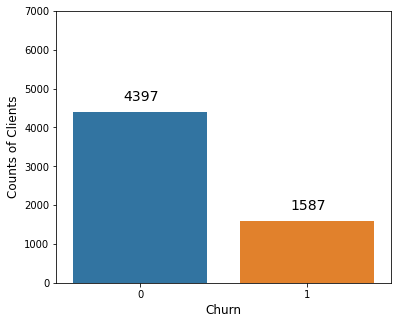

In [50]:
plt.figure(figsize=(6,5))

ax = sns.countplot(x='Churn', data=df)

plt.xlabel('Churn', fontsize= 12)
plt.ylabel('Counts of Clients', fontsize= 12)
plt.ylim(0,7000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 14)
    
plt.show()

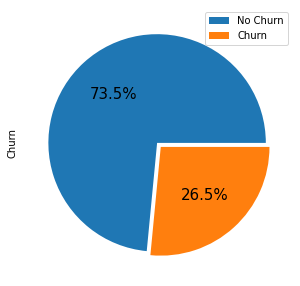

In [51]:
plt.figure(figsize=(6,5))

df['Churn'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Churn', 'Churn'])
plt.show()

In [52]:
gender_map = {'Female': 0, 'Male': 1}
yes_or_no_map = {'No': 0, 'Yes': 1} 
multiplelines_map = {'No phone service': -1, 'No': 0, 'Yes': 1}
internetservice_map = {'No': -1, 'DSL': 0, 'Fiber optic': 1}
add_netservices_map = {'No internet service': -1, 'No': 0, 'Yes': 1} 
contract_map = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
paymentmethod_map = {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}


df['gender'] = df['gender'].map(gender_map).astype('int')
df['Partner'] = df['Partner'].map(yes_or_no_map).astype('int')
df['Dependents'] = df['Dependents'].map(yes_or_no_map).astype('int')
df['PhoneService'] = df['PhoneService'].map(yes_or_no_map).astype('int')
df['MultipleLines'] = df['MultipleLines'].map(multiplelines_map).astype('int')
df['InternetService'] = df['InternetService'].map(internetservice_map).astype('int')
df['OnlineSecurity'] = df['OnlineSecurity'].map(add_netservices_map).astype('int')
df['OnlineBackup'] = df['OnlineBackup'].map(add_netservices_map).astype('int')
df['DeviceProtection'] = df['DeviceProtection'].map(add_netservices_map).astype('int')
df['TechSupport'] = df['TechSupport'].map(add_netservices_map).astype('int')
df['StreamingTV'] = df['StreamingTV'].map(add_netservices_map).astype('int')
df['StreamingMovies'] = df['StreamingMovies'].map(add_netservices_map).astype('int')
df['Contract'] = df['Contract'].map(contract_map).astype('int')
df['PaperlessBilling'] = df['PaperlessBilling'].map(yes_or_no_map).astype('int')
df['PaymentMethod'] = df['PaymentMethod'].map(paymentmethod_map).astype('int')

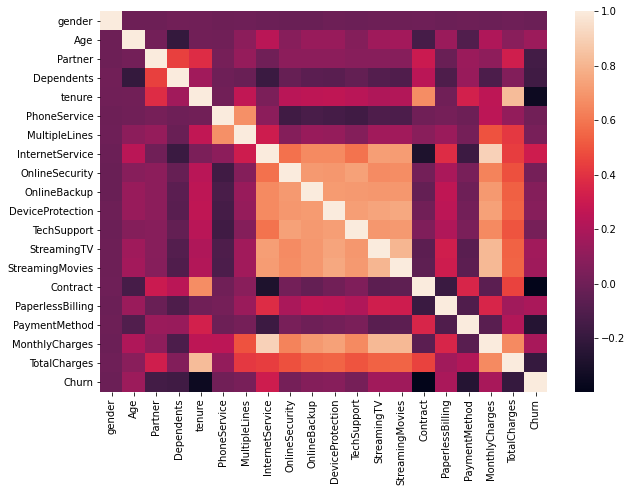

In [53]:
#Plotting heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr());

In [54]:
# Drop redundant value
feature_drop = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'Partner', 'Dependents', 'MultipleLines', 'TotalCharges', 'InternetService']

df_new = df.drop(feature_drop, axis=1)

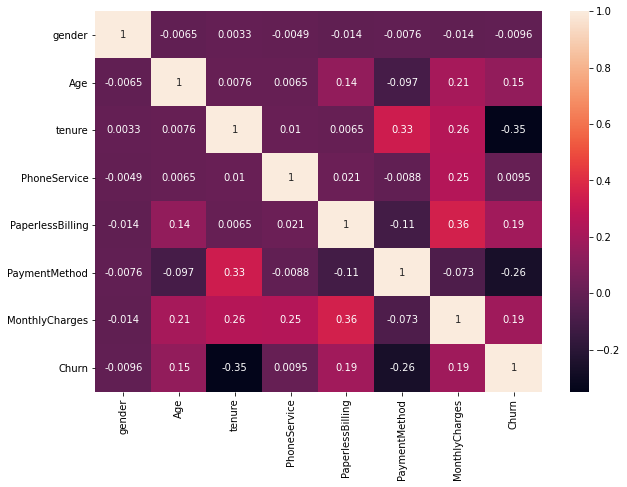

In [55]:
# Heatmap check
plt.figure(figsize=(10,7))
sns.heatmap(df_new.corr(), annot=True);

In [56]:
df_new.head()

,gender,Age,tenure,PhoneService,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,32,72,1,0,3,24.10,0
2,0,66,38,1,1,2,74.95,1
3,1,35,4,1,1,0,55.90,0
4,1,26,2,1,0,0,53.45,0
5,0,30,70,0,1,2,49.85,0


In [57]:
# Developing preprocessing with MinMaxScaler
scaler = MinMaxScaler()

In [58]:
# MinMaxScaler Determined Columns
columns_scaler = ['Age', 'MonthlyCharges', 'tenure']
df_new[columns_scaler] = scaler.fit_transform(df_new[columns_scaler])

In [59]:
df_new.head()

,gender,Age,tenure,PhoneService,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0.269231,1.000000,1,0,3,0.064368,0
2,0,0.923077,0.527778,1,1,2,0.567029,1
3,1,0.326923,0.055556,1,1,0,0.378716,0
4,1,0.153846,0.027778,1,0,0,0.354498,0
5,0,0.230769,0.972222,0,1,2,0.318911,0


## Modeling Data

In [60]:
X = df_new.drop(['Churn'],axis=1)
y = df_new['Churn']

In [61]:
# Feature importance with RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)
importances = rf.feature_importances_

In [62]:
# Define feature importances
feat_importance = pd.DataFrame({'Variable':X.columns,'Importances':importances})
feat_importance

,Variable,Importances
0,gender,0.021244
1,Age,0.199915
2,tenure,0.320407
3,PhoneService,0.010621
4,PaperlessBilling,0.027900
5,PaymentMethod,0.080959
6,MonthlyCharges,0.338953


In [63]:
feat_importance.sort_values(by=['Importances'],ascending=False)

,Variable,Importances
6,MonthlyCharges,0.338953
2,tenure,0.320407
1,Age,0.199915
5,PaymentMethod,0.080959
4,PaperlessBilling,0.027900
0,gender,0.021244
3,PhoneService,0.010621


In [64]:
# Define best column
best_col = ['MonthlyCharges', 'tenure', 'Age','PaymentMethod', 'PaperlessBilling', 'gender','PhoneService']
X_red = X[best_col]

In [65]:
# Training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.2, random_state=42)

### Determining Model

In [66]:
# Support Vector Machine Model
svc = SVC(probability=True)
svc.fit(X_train,y_train)

#Check score
svc.score(X_test,y_test)

0.7994987468671679

In [67]:
# Decision Tree Model
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# Check score
dt.score(X_test,y_test)

0.7017543859649122

In [68]:
# Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# Check Score
rf.score(X_test,y_test)

0.7903091060985797

### Model with Support Vector Machine

In [69]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [70]:
# Define parameters
param_grid = {'C': [ 1, 10, 100, 1000], 
              'gamma': [0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
svc_gridcv = GridSearchCV(svc, param_grid, refit = True, verbose = 3)

In [71]:
# Fitting train data
svc_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.772, total=   2.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.779, total=   2.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.771, total=   2.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.766, total=   2.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.789, total=   2.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.733, total=   2.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.732, total=   2.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.732, total=   2.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.732, total=   2.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [72]:
# Define best scores
svc_gridcv.best_score_

0.7875480745108562

In [73]:
# Determine the best parameter
print(svc_gridcv.best_params_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [74]:
# Predict the data
y_pred_test = svc_gridcv.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       891
           1       0.71      0.42      0.53       306

    accuracy                           0.81      1197
   macro avg       0.77      0.68      0.70      1197
weighted avg       0.80      0.81      0.79      1197



### Determine Model Fit

In [76]:
y_pred_train = svc_gridcv.predict(X_train)
y_pred_test = svc_gridcv.predict(X_test)
y_proba_train = svc_gridcv.predict_proba(X_train)[:,1]
y_proba_test = svc_gridcv.predict_proba(X_test)[:,1]

In [77]:
# Accuracy score of training data
print(accuracy_score(y_train, y_pred_train))

0.7940254856904115


In [78]:
# Accuracy score of testing data
print(accuracy_score(y_test, y_pred_test))

0.8078529657477026


It can be seen that the model is balanced

### Evaluating Model Performance

In [79]:
y_pred_train = svc_gridcv.predict(X_train)
y_pred_test = svc_gridcv.predict(X_test)
y_proba_train = svc_gridcv.predict_proba(X_train)[:,1]
y_proba_test = svc_gridcv.predict_proba(X_test)[:,1]
cm_train = confusion_matrix(y_train,y_pred_train)
cm_test = confusion_matrix(y_test,y_pred_test)

In [80]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

In [81]:
# True Positive
tp_train, tp_test = cm_train[1][1], cm_test[1][1]
# True Negative
tn_train, tn_test = cm_train[0][0], cm_test[0][0]
# False Positive
fp_train, fp_test = cm_train[1][0], cm_test[1][0]
# False Negative
fn_train, fn_test = cm_train[0][1], cm_test[0][1]

In [82]:
# Overall, how often is the classifier correct?
accuracy_train, accuracy_test = ((tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train)), (
            (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test))
# When it's actually yes, how often does it predict yes?
recall_train, recall_test = (tp_train / (tp_train + fp_train)), (tp_test / (tp_test + fp_test))
# When it's actually no, how often does it predict no?
specificity_train, specificity_test = (tn_train / (tn_train + fn_train)), (tn_test / (tn_test + fn_test))
# When it predicts yes, how often is it correct?
precision_train, precision_test = (tp_train / (tp_train + fn_train)), (tp_test / (tp_test + fn_test))
# F1 Score
f1_score_train, f1_score_test = (2 * (precision_train * recall_train) / (precision_train + recall_train)), (
            2 * (precision_test * recall_test) / (precision_test + recall_test))

In [83]:
# Print all the evaluation metrics
print('\nTrain Confusion Matrix')
print(cm_train)
print('Test Confusion Matrix')
print(cm_test)
print('\nArea Under Curve')
print('AUC train & test        : %.2f%%' % (roc_auc_train * 100), '&', '%.2f%%' % (roc_auc_test * 100))
print('\nConfusion Matrix Evaluation')
print('Accuracy train & test   : %.2f%%' % (accuracy_train * 100), '&', '%.2f%%' % (accuracy_test * 100))
print('Recall train & test     : %.2f%%' % (recall_train * 100), '&', '%.2f%%' % (recall_test * 100))
print('Specificity train & test: %.2f%%' % (specificity_train * 100), '&', '%.2f%%' % (specificity_test * 100))
print('Precision train & test  : %.2f%%' % (precision_train * 100), '&', '%.2f%%' % (precision_test * 100))
print('F1 Score train & test   : %.2f%%' % (f1_score_train * 100), '&', '%.2f%%' % (f1_score_test * 100))
print('Log Loss train & test   :', round(log_loss(y_train, y_pred_train), 4), '&',
          round(log_loss(y_test, y_pred_test), 4))


Train Confusion Matrix
[[3283  223]
 [ 763  518]]
Test Confusion Matrix
[[839  52]
 [178 128]]

Area Under Curve
AUC train & test        : 80.79% & 80.39%

Confusion Matrix Evaluation
Accuracy train & test   : 79.40% & 80.79%
Recall train & test     : 40.44% & 41.83%
Specificity train & test: 93.64% & 94.16%
Precision train & test  : 69.91% & 71.11%
F1 Score train & test   : 51.24% & 52.67%
Log Loss train & test   : 7.1141 & 6.6366


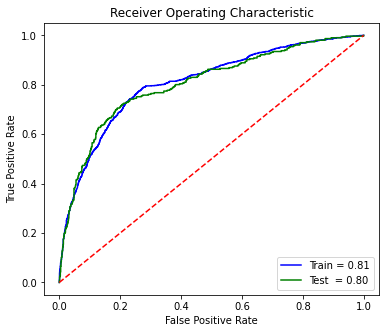

In [84]:
# Create plot of ROC_AUC
plt.figure(figsize=(6, 5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label='Train = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'g', label='Test  = %0.2f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()